<a href="https://colab.research.google.com/github/TheRadDani/Pytorch-exercises/blob/main/nvidia_deeplearningexamples_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook requires a GPU runtime to run.
### Please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# ResNet50

*Author: NVIDIA*

**ResNet50 model trained with mixed precision using Tensor Cores.**

<img src="https://pytorch.org/assets/images/classification.jpg" alt="alt" width="50%"/>



### Model Description

The ***ResNet50 v1.5*** model is a modified version of the [original ResNet50 v1 model](https://arxiv.org/abs/1512.03385).

The difference between v1 and v1.5 is that, in the bottleneck blocks which requires
downsampling, v1 has stride = 2 in the first 1x1 convolution, whereas v1.5 has stride = 2 in the 3x3 convolution.

This difference makes ResNet50 v1.5 slightly more accurate (\~0.5% top1) than v1, but comes with a small performance drawback (\~5% imgs/sec).

The model is initialized as described in [Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification](https://arxiv.org/pdf/1502.01852.pdf)

This model is trained with mixed precision using Tensor Cores on Volta, Turing, and the NVIDIA Ampere GPU architectures. Therefore, researchers can get results over 2x faster than training without Tensor Cores, while experiencing the benefits of mixed precision training. This model is tested against each NGC monthly container release to ensure consistent accuracy and performance over time.

Note that the ResNet50 v1.5 model can be deployed for inference on the [NVIDIA Triton Inference Server](https://github.com/triton-inference-server/server) using TorchScript, ONNX Runtime or TensorRT as an execution backend. For details check [NGC](https://ngc.nvidia.com/catalog/resources/nvidia:resnet_for_triton_from_pytorch)


### Example

In the example below we will use the pretrained ***ResNet50 v1.5*** model to perform inference on ***image*** and present the result.

To run the example you need some extra python packages installed. These are needed for preprocessing images and visualization.

In [ ]:
!pip install validators matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=7fda40da217b2354c4755f07ca73d5a0a5f81d23cfbd310115427a338bb98ef3
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


Load the model pretrained on IMAGENET dataset.

In [ ]:
resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50.eval().to(device)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layers): Sequential(
    (0): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d

Prepare sample input data.

In [ ]:
# Get the list of methods and attributes
methods_and_attributes = dir(utils)

# Print the list of methods and attributes
for item in methods_and_attributes:
    print(item)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
get_imgnet_classes
pick_n_best
prepare_input_from_uri


In [ ]:
# Load the local image
image_path = './MsLuna.jpeg'
image = Image.open(image_path)

# Resize and normalize the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Preprocess the image
input_tensor = preprocess(image).unsqueeze(0).to(device)

In [ ]:
# Perform inference on custume image
with torch.no_grad():
    output = resnet50(input_tensor)

In [ ]:
results = utils.pick_n_best(predictions=output, n=5)

sample 0: [('Chihuahua', '603.4%'), ('seat belt, seatbelt', '519.5%'), ('cocker spaniel, English cocker spaniel, cocker', '423.5%'), ('Scotch terrier, Scottish terrier, Scottie', '398.7%'), ('sunglasses, dark glasses, shades', '369.9%')]


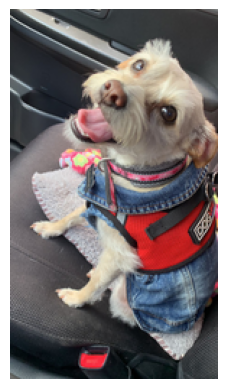

[[('Chihuahua', '603.4%'), ('seat belt, seatbelt', '519.5%'), ('cocker spaniel, English cocker spaniel, cocker', '423.5%'), ('Scotch terrier, Scottish terrier, Scottie', '398.7%'), ('sunglasses, dark glasses, shades', '369.9%')]]


In [ ]:
image.thumbnail((512,512), Image.ANTIALIAS)
plt.grid(0)
plt.axis('off')
plt.imshow(image)
plt.show()
print(results)

In [ ]:
uris = [
    'http://images.cocodataset.org/test-stuff2017/000000024309.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000028117.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000006149.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000004954.jpg',
]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

Run inference. Use `pick_n_best(predictions=output, n=topN)` helper function to pick N most probably hypothesis according to the model.

In [ ]:
with torch.no_grad():
    output = torch.nn.functional.softmax(resnet50(batch), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)

sample 0: [('laptop, laptop computer', '34.7%'), ('mouse, computer mouse', '11.9%'), ('notebook, notebook computer', '10.9%'), ('monitor', '3.9%'), ('web site, website, internet site, site', '3.1%')]
sample 1: [('mashed potato', '78.6%'), ('broccoli', '7.3%'), ('meat loaf, meatloaf', '2.5%'), ('plate', '1.8%'), ('guacamole', '0.2%')]
sample 2: [('racket, racquet', '25.4%'), ('tennis ball', '6.0%'), ('ping-pong ball', '2.0%'), ('catamaran', '0.3%'), ('bathtub, bathing tub, bath, tub', '0.3%')]
sample 3: [('groenendael', '12.7%'), ('Scottish deerhound, deerhound', '11.2%'), ('flat-coated retriever', '6.6%'), ('kelpie', '6.1%'), ('Great Dane', '3.1%')]


Display the result.

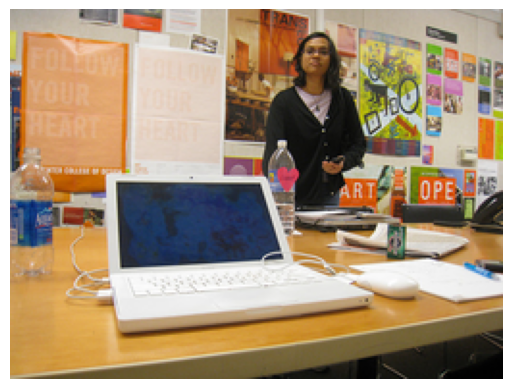

[('laptop, laptop computer', '34.7%'), ('mouse, computer mouse', '11.9%'), ('notebook, notebook computer', '10.9%'), ('monitor', '3.9%'), ('web site, website, internet site, site', '3.1%')]


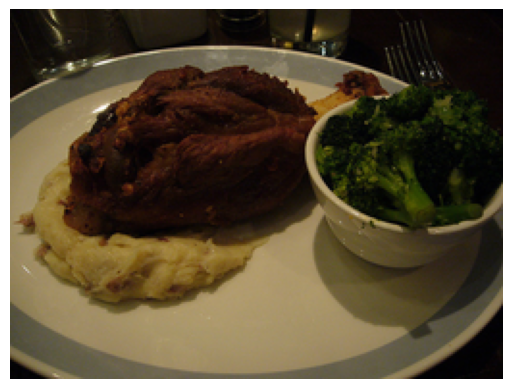

[('mashed potato', '78.6%'), ('broccoli', '7.3%'), ('meat loaf, meatloaf', '2.5%'), ('plate', '1.8%'), ('guacamole', '0.2%')]


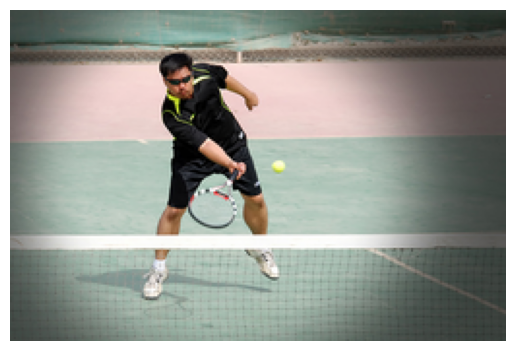

[('racket, racquet', '25.4%'), ('tennis ball', '6.0%'), ('ping-pong ball', '2.0%'), ('catamaran', '0.3%'), ('bathtub, bathing tub, bath, tub', '0.3%')]


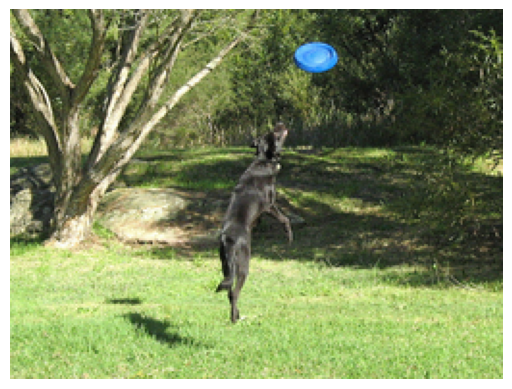

[('groenendael', '12.7%'), ('Scottish deerhound, deerhound', '11.2%'), ('flat-coated retriever', '6.6%'), ('kelpie', '6.1%'), ('Great Dane', '3.1%')]


In [ ]:
for uri, result in zip(uris, results):
    img = Image.open(requests.get(uri, stream=True).raw)
    img.thumbnail((256,256), Image.ANTIALIAS)
    plt.grid(0)
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print(result)


### Details
For detailed information on model input and output, training recipies, inference and performance visit:
[github](https://github.com/NVIDIA/DeepLearningExamples/tree/master/PyTorch/Classification/ConvNets/resnet50v1.5)
and/or [NGC](https://ngc.nvidia.com/catalog/resources/nvidia:resnet_50_v1_5_for_pytorch)

### References

 - [Original ResNet50 v1 paper](https://arxiv.org/abs/1512.03385)
 - [Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification](https://arxiv.org/pdf/1502.01852.pdf)
 - [model on github](https://github.com/NVIDIA/DeepLearningExamples/tree/master/PyTorch/Classification/ConvNets/resnet50v1.5)
 - [model on NGC](https://ngc.nvidia.com/catalog/resources/nvidia:resnet_50_v1_5_for_pytorch)
 - [pretrained model on NGC](https://ngc.nvidia.com/catalog/models/nvidia:resnet50_pyt_amp)